In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [5]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [6]:
df.shape

(20640, 9)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
X=df.drop("MedHouseVal",axis=1)
y=df["MedHouseVal"]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
num_features = X.columns
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
     ])
    

In [23]:
preprocessor = ColumnTransformer([
    ("num",num_pipeline,num_features)
])

In [24]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.fit_transform(X_test)

In [25]:
X_train_prepared.shape,X_test_prepared.shape

((16512, 8), (4128, 8))

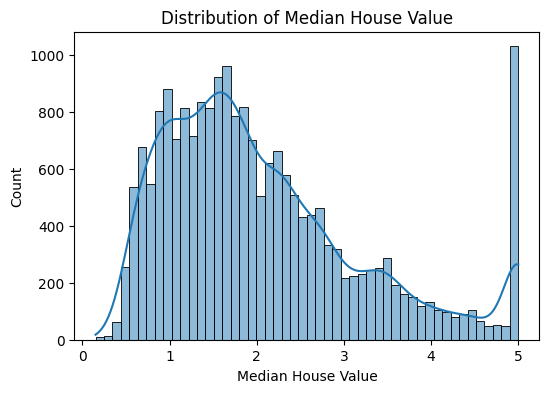

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(y,bins=50,kde=True)
plt.xlabel("Median House Value")
plt.title("Distribution of Median House Value")
plt.show()

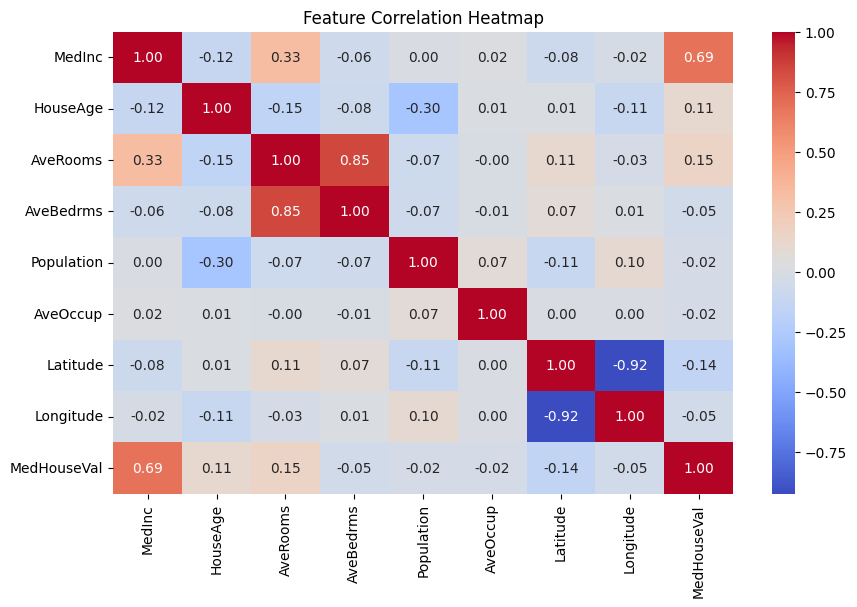

In [28]:
plt.figure(figsize = (10,6))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap = "coolwarm",fmt = ".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

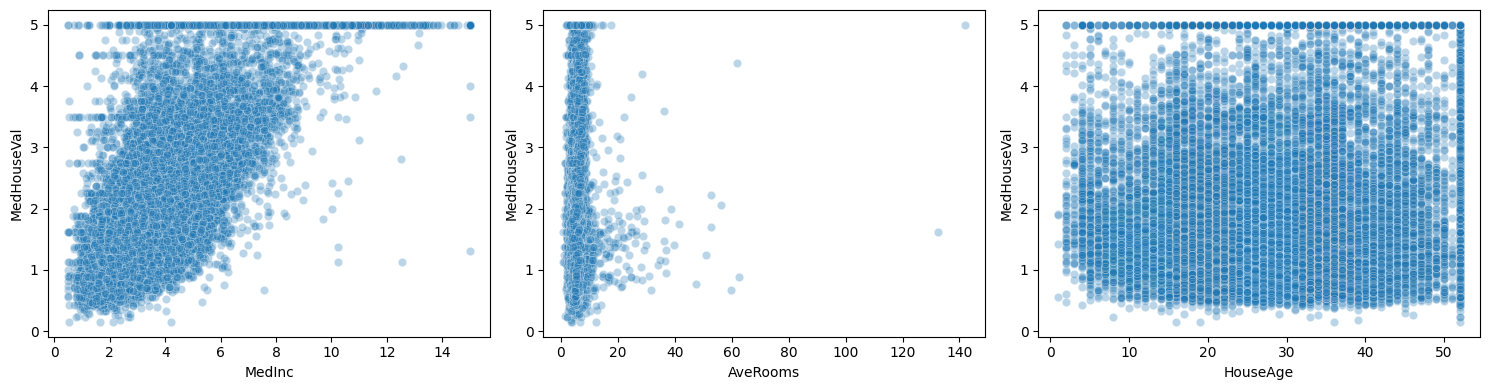

In [32]:
important_features = ["MedInc","AveRooms","HouseAge"]

plt.figure(figsize = (15,4))
for i,col in enumerate(important_features,1):
    plt.subplot(1,3,i)
    sns.scatterplot(x = df[col],y = y,alpha = 0.3)
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
plt.tight_layout()
plt.show()

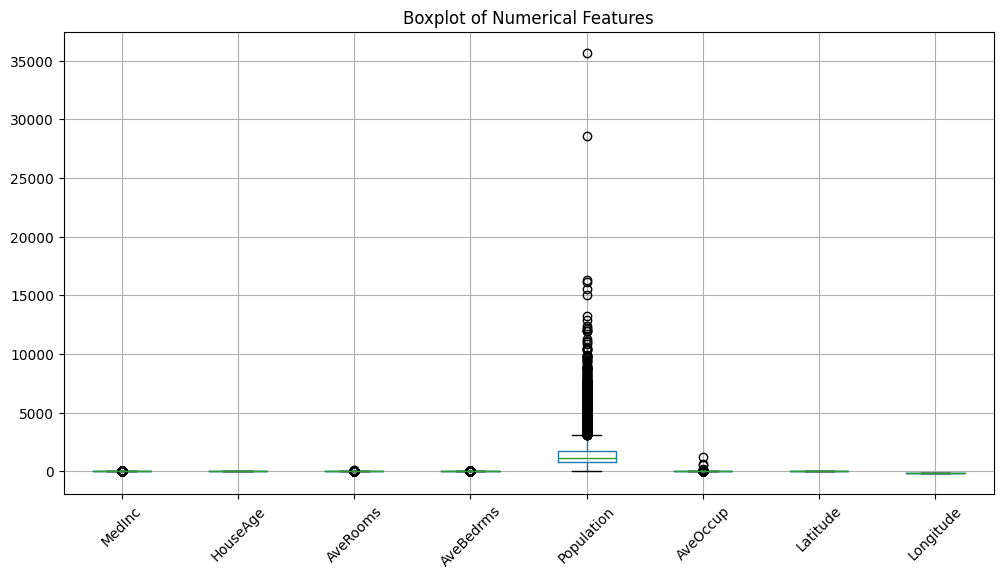

In [33]:
plt.figure(figsize = (12,6))
df.drop("MedHouseVal", axis = 1).boxplot(rot=45)
plt.title("Boxplot of Numerical Features")
plt.show()

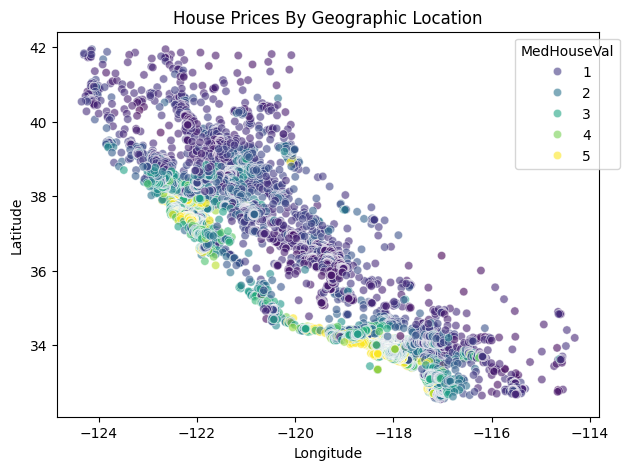

In [34]:
plt.figure(figsize = (7,5))
sns.scatterplot(
    x = df["Longitude"],
    y = df["Latitude"],
    hue = y,
    palette = "viridis",
    alpha = 0.6
)
plt.title("House Prices By Geographic Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title = "MedHouseVal",bbox_to_anchor = (1.05,1))
plt.show()